<a href="https://colab.research.google.com/github/Dharamraj07/Dharamraj07/blob/main/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('Used_Bikes.csv')
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [ ]:
df.shape

(32648, 8)

In [ ]:
df.columns


Index(['bike_name', 'price', 'city', 'kms_driven', 'owner', 'age', 'power',
       'brand'],
      dtype='object')

In [ ]:
df.describe()

,price,kms_driven,age,power
count,3.264800e+04,32648.000000,32648.000000,32648.000000
mean,6.829542e+04,26344.625184,8.048211,213.511302
std,9.071860e+04,22208.527695,4.031700,134.428868
min,4.400000e+03,1.000000,1.000000,100.000000
25%,2.500000e+04,12000.000000,5.000000,150.000000
50%,4.300000e+04,20373.000000,7.000000,150.000000
75%,8.000000e+04,35000.000000,10.000000,220.000000
max,1.900000e+06,750000.000000,63.000000,1800.000000


In [ ]:
## check the number of null values in all columns
## if any, remove/replace them as per the type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [ ]:
df.isnull()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
32643,False,False,False,False,False,False,False,False
32644,False,False,False,False,False,False,False,False
32645,False,False,False,False,False,False,False,False
32646,False,False,False,False,False,False,False,False


In [ ]:
#no null value found on data set
df.isnull().sum()

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [ ]:
df.count()

bike_name     32648
price         32648
city          32648
kms_driven    32648
owner         32648
age           32648
power         32648
brand         32648
dtype: int64

In [ ]:
df['bike_name'].value_counts()

Bajaj Pulsar 150cc                                   2776
Bajaj Avenger Street 220                             2531
Bajaj Avenger 220cc                                  2060
Royal Enfield Classic 350cc                          1673
Hero Passion Pro 100cc                               1432
                                                     ... 
Indian Chief Classic 1800cc                             1
TVS Apache RTR 160cc White Race Edition Rear Disc       1
Triumph Bonneville T100 900cc                           1
Bajaj CT110 ES Alloy                                    1
Yamaha FZS FI 150cc Special Edition                     1
Name: bike_name, Length: 471, dtype: int64

In [ ]:
df['city'].value_counts()

Delhi            7318
Bangalore        2723
Mumbai           2591
Hyderabad        2160
Pune             1724
                 ... 
Surendranagar       1
Khandela            1
Mohammadabad        1
Shimla              1
Sidhi               1
Name: city, Length: 443, dtype: int64

In [ ]:
# check missing value
df_missing = df.isna().sum()
print(df_missing[df_missing > 0])

Series([], dtype: int64)


In [ ]:
df.describe()

,price,kms_driven,age,power
count,3.264800e+04,32648.000000,32648.000000,32648.000000
mean,6.829542e+04,26344.625184,8.048211,213.511302
std,9.071860e+04,22208.527695,4.031700,134.428868
min,4.400000e+03,1.000000,1.000000,100.000000
25%,2.500000e+04,12000.000000,5.000000,150.000000
50%,4.300000e+04,20373.000000,7.000000,150.000000
75%,8.000000e+04,35000.000000,10.000000,220.000000
max,1.900000e+06,750000.000000,63.000000,1800.000000


In [ ]:
# select only the numerical columns to be normalized
numerical_cols = ['price', 'kms_driven', 'age', 'power']

In [ ]:
# create a MinMaxScaler object
scaler = MinMaxScaler()

In [ ]:
# fit and transform the selected columns using the scaler
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
# display the first few rows of the normalized dataframe
print(df.head())

                              bike_name     price       city  kms_driven  \
0    TVS Star City Plus Dual Tone 110cc  0.016143  Ahmedabad    0.023537   
1           Royal Enfield Classic 350cc  0.060931      Delhi    0.014665   
2                  Triumph Daytona 675R  0.314201      Delhi    0.000145   
3                  TVS Apache RTR 180cc  0.031969  Bangalore    0.021771   
4  Yamaha FZ S V 2.0 150cc-Ltd. Edition  0.039882  Bangalore    0.013332   

         owner       age     power          brand  
0  First Owner  0.032258  0.005882            TVS  
1  First Owner  0.048387  0.147059  Royal Enfield  
2  First Owner  0.112903  0.338235        Triumph  
3  First Owner  0.048387  0.047059            TVS  
4  First Owner  0.032258  0.029412         Yamaha  


In [ ]:
df['owner'].value_counts()

First Owner             29964
Second Owner             2564
Third Owner               108
Fourth Owner Or More       12
Name: owner, dtype: int64

<Axes: xlabel='price', ylabel='owner'>

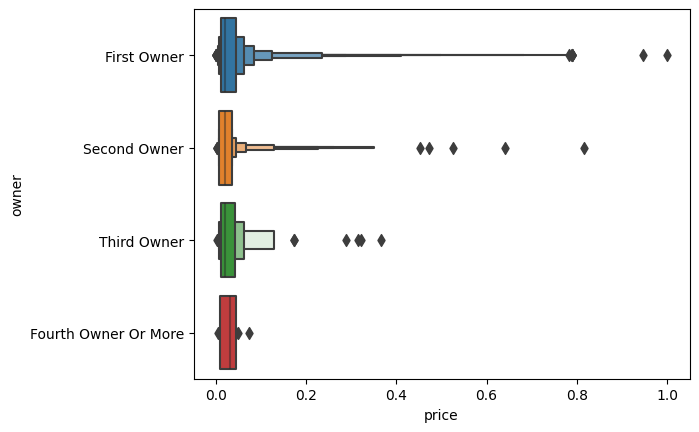

In [ ]:
sns.boxenplot(x="price",y="owner",data=df)

<Axes: xlabel='brand', ylabel='price'>

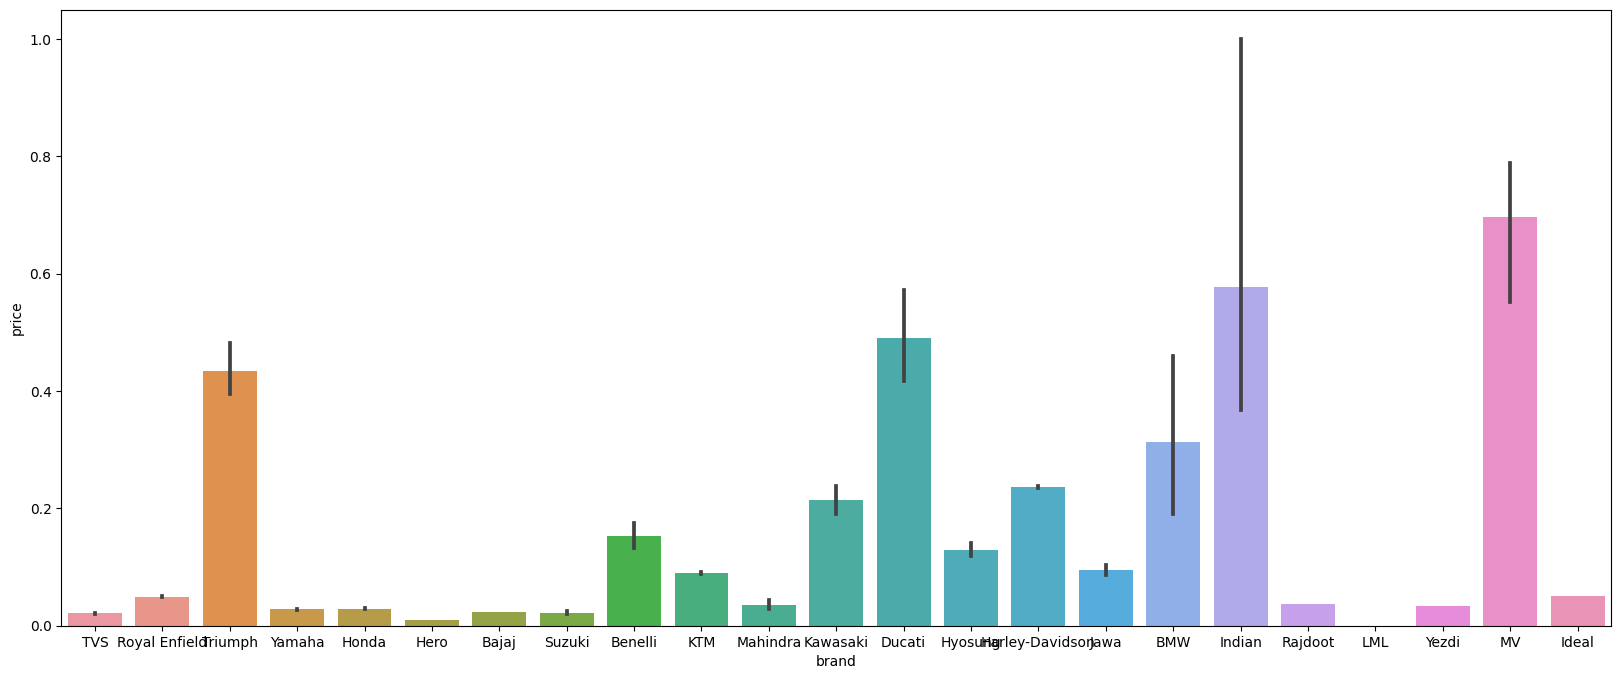

In [ ]:
plt.figure(figsize = (20,8))
sns.barplot(x="brand",y="price",data=df)

<Axes: xlabel='kms_driven', ylabel='price'>

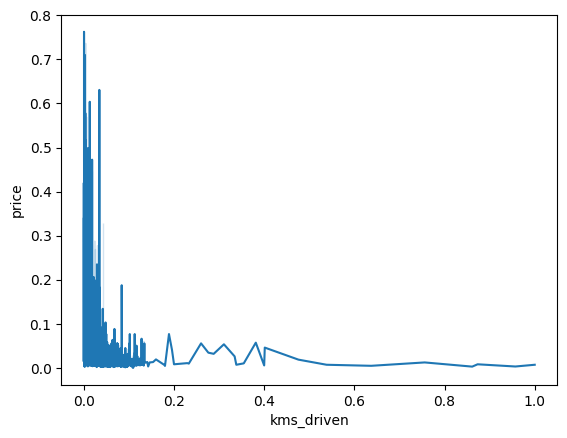

In [ ]:
#used bike price based on kms driven
sns.lineplot(x="kms_driven",y="price",data=df )

<Axes: xlabel='age', ylabel='price'>

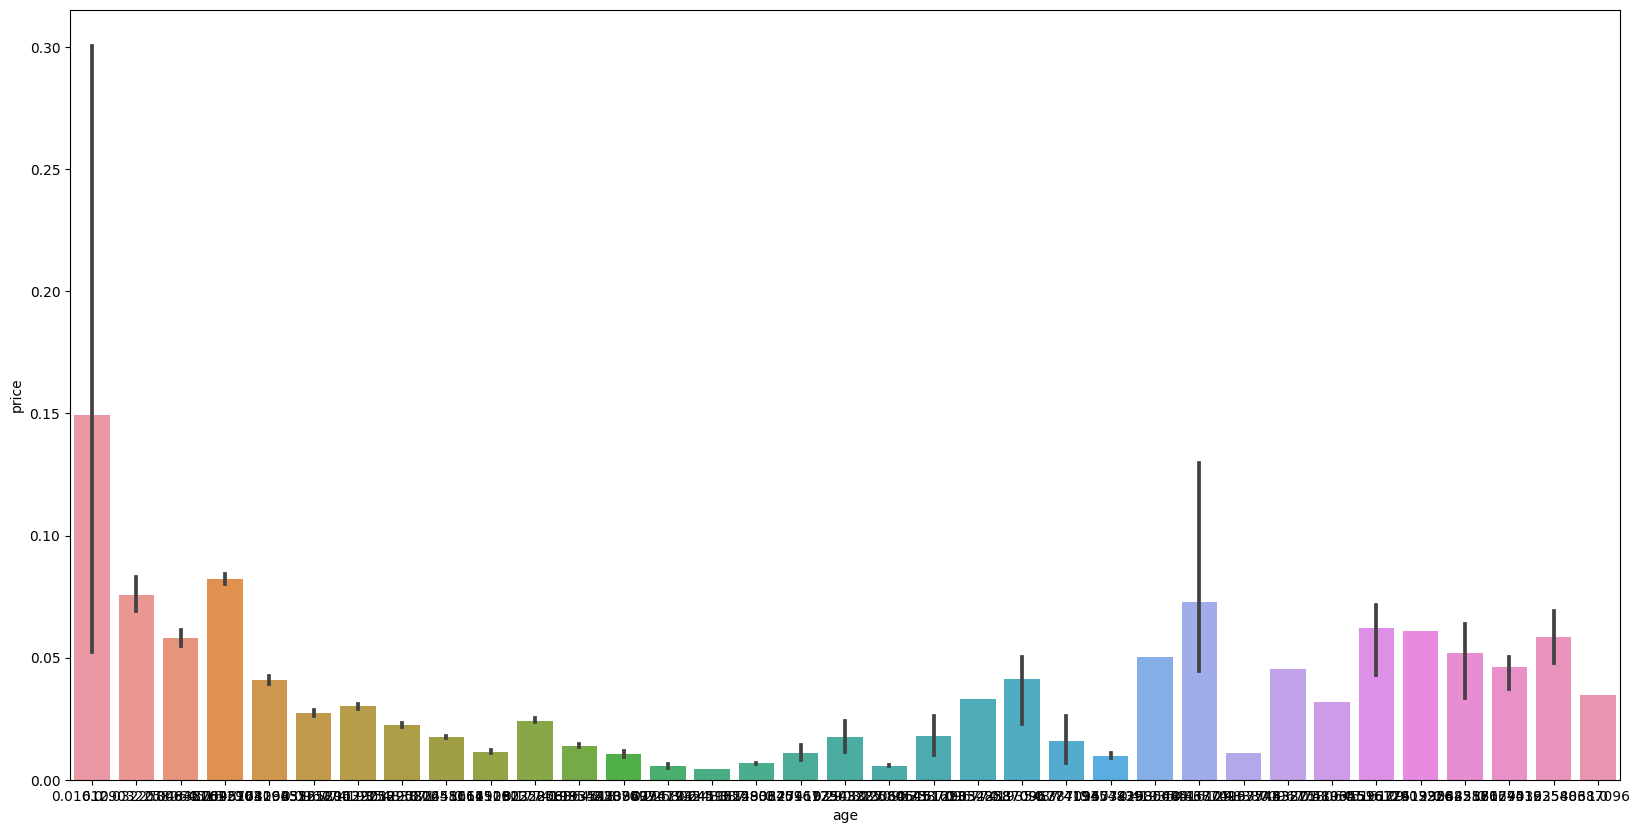

In [ ]:
#used bike price based on age
plt.figure(figsize = (20,10))
sns.barplot(x='age',y='price',data=df)

<Axes: xlabel='power', ylabel='price'>

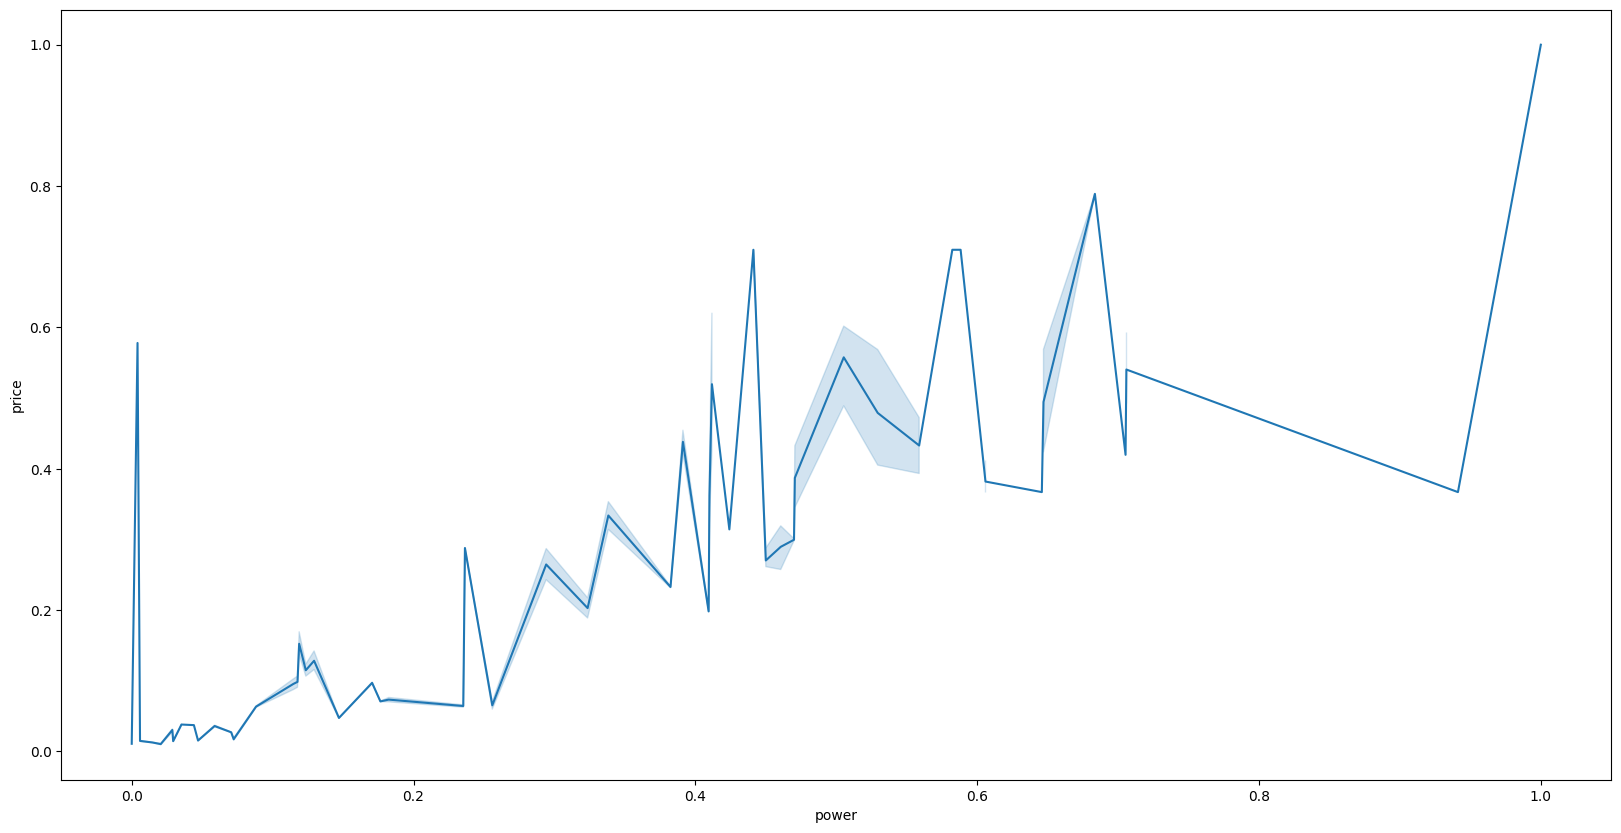

In [ ]:
#used bike price based on power
plt.figure(figsize = (20,10))
sns.lineplot(x='power',y='price',data=df)

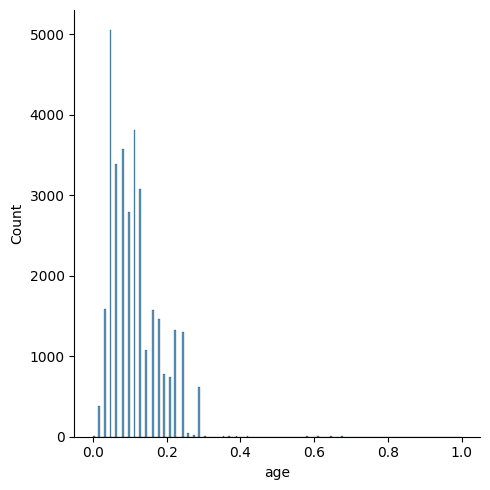

In [ ]:
df_cleaned = df.copy()
df_cleaned = df_cleaned[-(df_cleaned.age > df_cleaned.age.quantile(0.99))]
sns.displot(df["age"])

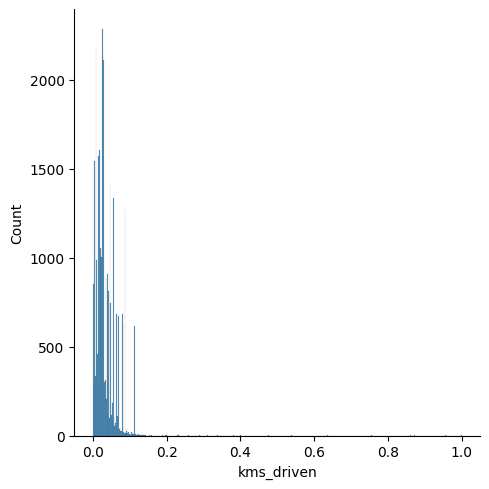

In [ ]:
df_cleaned = df_cleaned[df_cleaned.kms_driven < df_cleaned.kms_driven.quantile(0.99)]
sns.displot(df["kms_driven"])

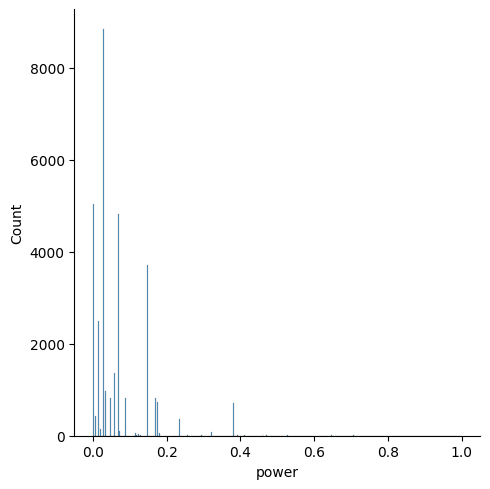

In [ ]:
df_cleaned = df_cleaned[df_cleaned.kms_driven < df_cleaned.kms_driven.quantile(0.99)]
sns.displot(df["power"])

In [ ]:
#correlation had improved after outliers Removal below
df_cleaned.corr().loc['price']

<ipython-input-98-df64320f581b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cleaned.corr().loc['price']


price         1.000000
kms_driven   -0.357935
age          -0.401473
power         0.861412
Name: price, dtype: float64

In [ ]:
df_cleaned.shape

(31035, 8)

In [ ]:
pd.concat([df_cleaned,pd.get_dummies(df_cleaned.owner).drop('Fourth Owner Or More',axis=1)],axis=1).corr().loc['price']

<ipython-input-100-e1f92a0c59f6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.concat([df_cleaned,pd.get_dummies(df_cleaned.owner).drop('Fourth Owner Or More',axis=1)],axis=1).corr().loc['price']


price           1.000000
kms_driven     -0.357935
age            -0.401473
power           0.861412
First Owner     0.051537
Second Owner   -0.054403
Third Owner     0.011540
Name: price, dtype: float64

In [ ]:
list(df_cleaned.brand.value_counts().tail(3).index)

['MV', 'Indian', 'LML']

In [ ]:
df_cleaned = df_cleaned[-((df_cleaned.brand == 'MV')|(df_cleaned.brand == 'Indian')|(df_cleaned.brand == 'LML'))]

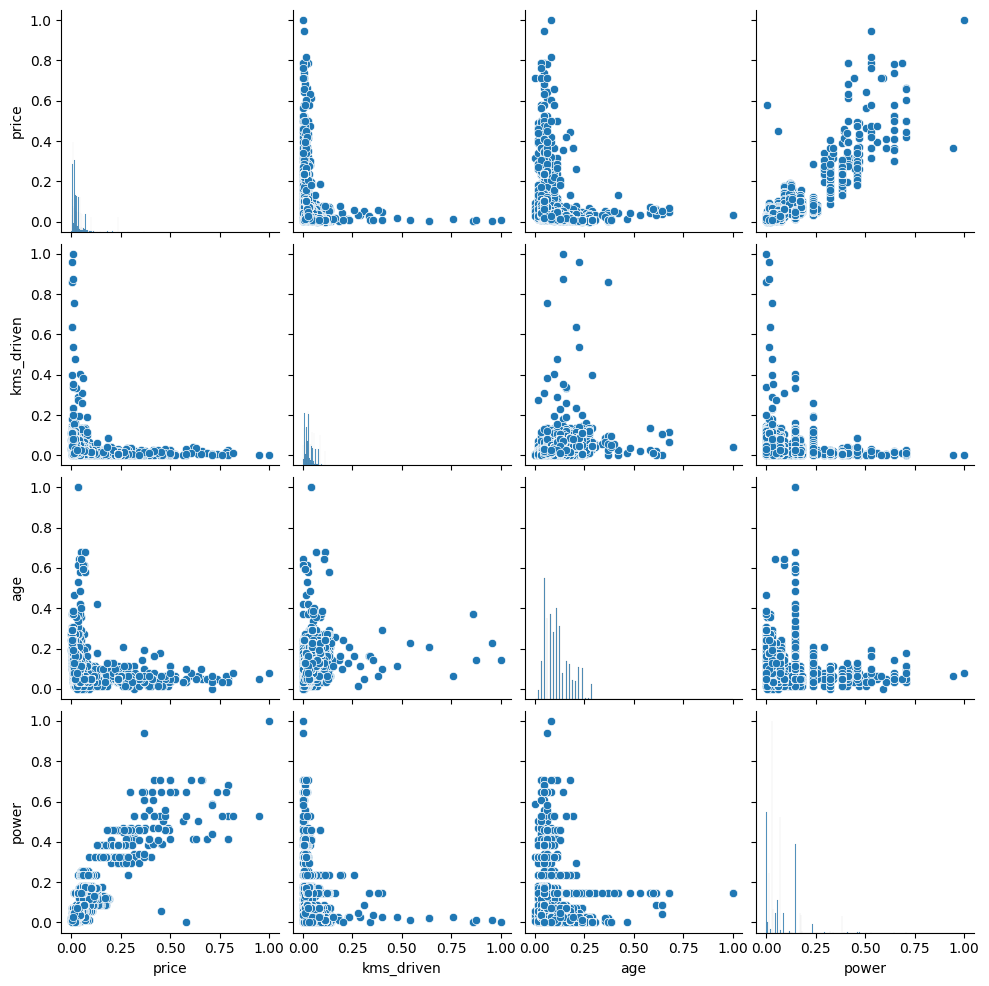

In [ ]:
#Plotting the pair plots of the dataset
sns.pairplot(df)

<ipython-input-104-dcf27eb7b85f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)


<function matplotlib.pyplot.show(close=None, block=None)>

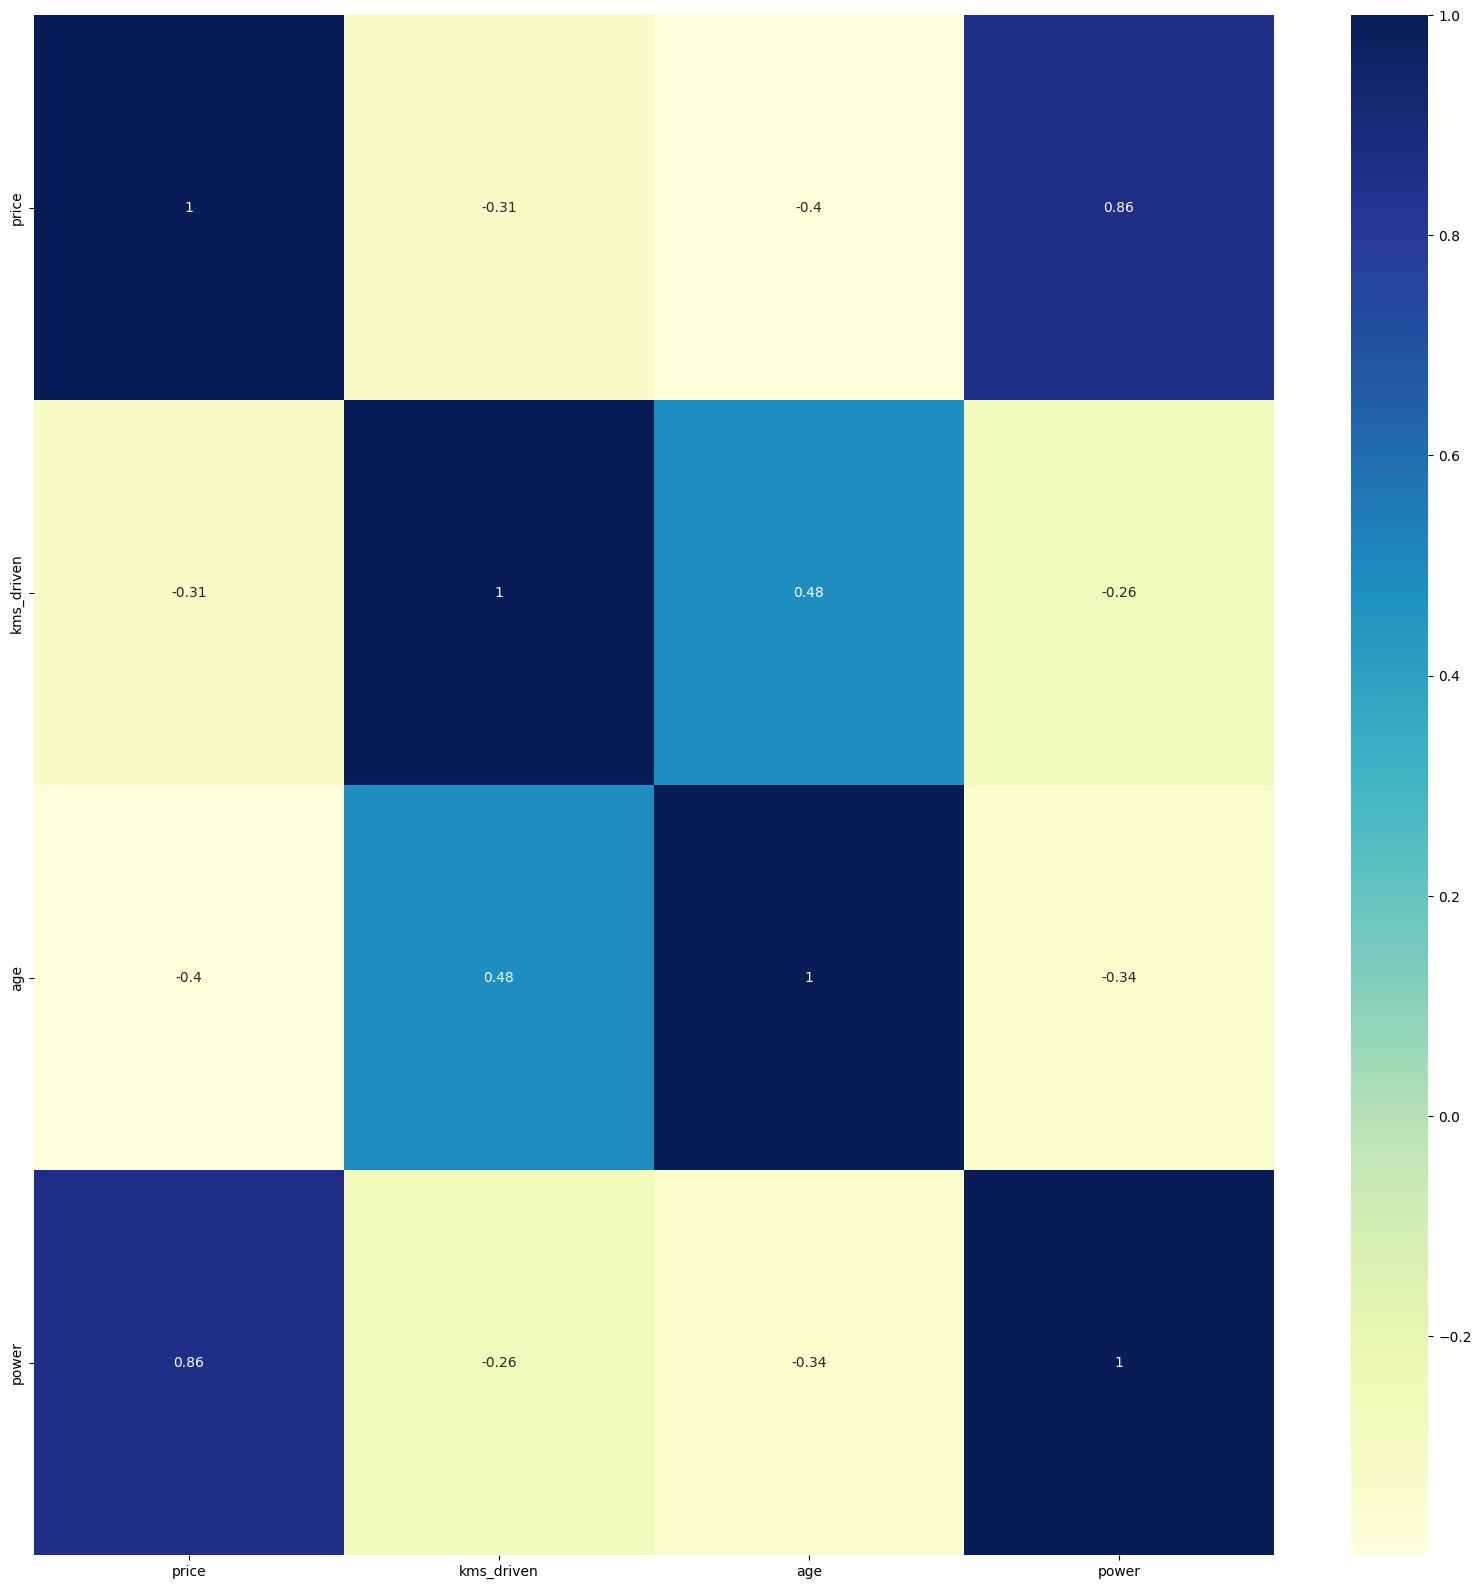

In [ ]:
#Data Correlation
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)
plt.show

In [ ]:
df=df.drop(['bike_name'],axis=1)
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       32648 non-null  float64
 1   city        32648 non-null  object 
 2   kms_driven  32648 non-null  float64
 3   owner       32648 non-null  object 
 4   age         32648 non-null  float64
 5   power       32648 non-null  float64
 6   brand       32648 non-null  object 
dtypes: float64(4), object(3)
memory usage: 1.7+ MB


In [ ]:
variables=df.select_dtypes(include=['object'])
variables.head()

,city,owner,brand
0,Ahmedabad,First Owner,TVS
1,Delhi,First Owner,Royal Enfield
2,Delhi,First Owner,Triumph
3,Bangalore,First Owner,TVS
4,Bangalore,First Owner,Yamaha


In [ ]:
dummies=pd.get_dummies(variables)
dummies

,city_24 Pargana,city_Abohar,city_Adalaj,city_Adoni,city_Adyar,city_Agra,city_Ahmedabad,city_Ahmednagar,city_Ajmer,city_Akot,...,brand_LML,brand_MV,brand_Mahindra,brand_Rajdoot,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Triumph,brand_Yamaha,brand_Yezdi
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32643,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32644,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32645,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32646,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#creating the dummy variables
dummies=pd.get_dummies(variables)
df=pd.concat([df,dummies],axis=1)
df=df.drop(['city','brand','owner'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Columns: 474 entries, price to brand_Yezdi
dtypes: float64(4), uint8(470)
memory usage: 15.6 MB


In [ ]:
#Setting X And Y
X=df.drop(['price'],axis=1)
X

,kms_driven,age,power,city_24 Pargana,city_Abohar,city_Adalaj,city_Adoni,city_Adyar,city_Agra,city_Ahmedabad,...,brand_LML,brand_MV,brand_Mahindra,brand_Rajdoot,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Triumph,brand_Yamaha,brand_Yezdi
0,0.023537,0.032258,0.005882,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0.014665,0.048387,0.147059,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.000145,0.112903,0.338235,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.021771,0.048387,0.047059,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.013332,0.032258,0.029412,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32643,0.029332,0.048387,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32644,0.008851,0.129032,0.047059,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32645,0.027163,0.080645,0.070588,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32646,0.112247,0.241935,0.014706,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y=df['price']
y

0        0.016143
1        0.060931
2        0.314201
3        0.031969
4        0.039882
           ...   
32643    0.018253
32644    0.013505
32645    0.029331
32646    0.005908
32647    0.009285
Name: price, Length: 32648, dtype: float64

In [ ]:
#Splitting The Data Into The Train And The Test Sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train

,kms_driven,age,power,city_24 Pargana,city_Abohar,city_Adalaj,city_Adoni,city_Adyar,city_Agra,city_Ahmedabad,...,brand_LML,brand_MV,brand_Mahindra,brand_Rajdoot,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Triumph,brand_Yamaha,brand_Yezdi
2690,0.042665,0.096774,0.147059,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
11586,0.010665,0.064516,0.070588,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2792,0.042665,0.096774,0.070588,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16926,0.000185,0.032258,0.035294,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
961,0.051999,0.080645,0.058824,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3520,0.004599,0.048387,0.147059,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
30878,0.027163,0.080645,0.070588,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10158,0.015845,0.177419,0.014706,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5339,0.047465,0.096774,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train

2690     0.047293
11586    0.034606
2792     0.024847
16926    0.043575
961      0.045157
           ...   
3520     0.079738
30878    0.029331
10158    0.016143
5339     0.014296
8814     0.009812
Name: price, Length: 26118, dtype: float64

In [ ]:
len(X_train)

26118

In [ ]:
len(X_test)

6530

In [ ]:
#Building and training the model
model=LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
model.score(X_test,y_test)

-9.154200444987463e+18

In [ ]:
predictions=model.predict(X_test)
predictions

array([0.03422546, 0.00967407, 0.00349426, ..., 0.02656555, 0.01498413,
       0.00231934])

Text(0, 0.5, 'Predictions')

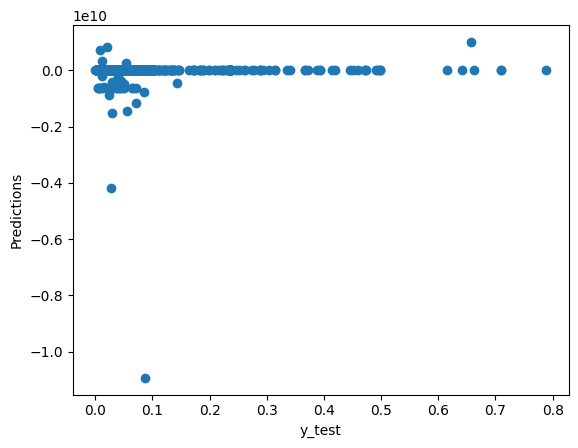

In [ ]:
plt.scatter(y_test,predictions)
plt.xlabel('y_test')
plt.ylabel('Predictions')

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred) # Convert probabilities to class labels
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
f_score = f1_score(y_test, y_pred_classes, average='weighted')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('F-score:', f_score)
mse = mean_squared_error(y_test,y_pred)
print('The Mean Squared error is : ', mse)
print('The Root Mean Squared error is : ', np.sqrt(mse))
print('The R2 Score is : ', r2_score(y_test,y_pred))

NameError: ignored

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
modell=RandomForestRegressor()

In [ ]:
modell.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
modell.score(X_test,y_test)

0.9748972764548259

In [ ]:
prediction=modell.predict(X_test)
prediction

array([0.04615951, 0.01113895, 0.00590842, ..., 0.03557185, 0.01614265,
       0.00717451])

Text(0, 0.5, 'prediction')

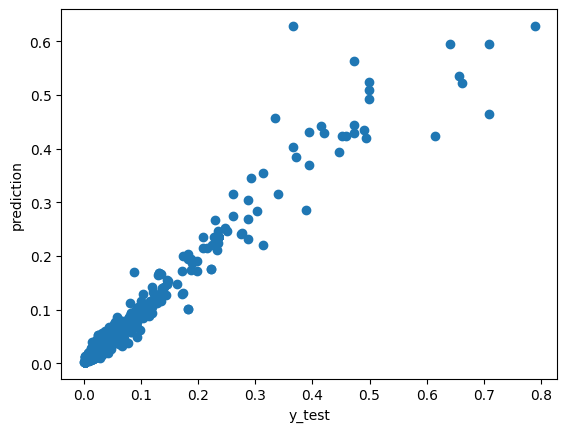

In [ ]:
plt.scatter(y_test,prediction)
plt.xlabel('y_test')
plt.ylabel('prediction')

In [ ]:
y_pred = modell.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print('The Mean Squared error is : ', mse)
print('The Root Mean Squared error is : ', np.sqrt(mse))
print('The R2 Score is : ', r2_score(y_test,y_pred))

The Mean Squared error is :  6.52370082706474e-05
The Root Mean Squared error is :  0.00807694300281037
The R2 Score is :  0.9748972764548259


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
modelll=DecisionTreeRegressor()

In [ ]:
modelll.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
modelll.score(X_test,y_test)

0.965116351487997

In [ ]:
prediction=modelll.predict(X_test)
prediction

array([0.03724414, 0.01033973, 0.00590842, ..., 0.0266934 , 0.01614265,
       0.00717451])

Text(0, 0.5, 'prediction')

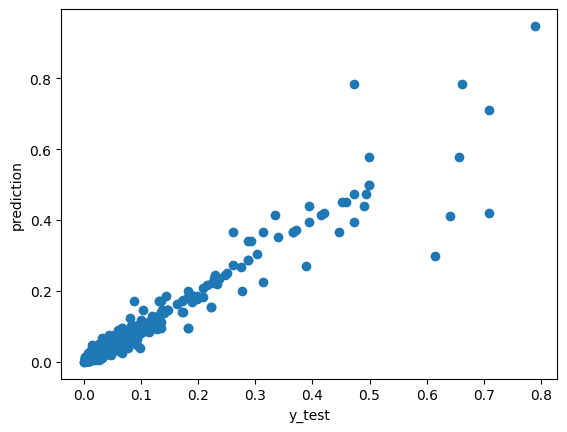

In [ ]:
plt.scatter(y_test,prediction)
plt.xlabel('y_test')
plt.ylabel('prediction')

In [ ]:
y_pred = modelll.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print('The Mean Squared error is : ', mse)
print('The Root Mean Squared error is : ', np.sqrt(mse))
print('The R2 Score is : ', r2_score(y_test,y_pred))

The Mean Squared error is :  9.065569568149094e-05
The Root Mean Squared error is :  0.009521328462010484
The R2 Score is :  0.965116351487997


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
modellll=KNeighborsRegressor()

In [ ]:
modellll.fit(X_train,y_train)

KNeighborsRegressor()

In [ ]:
modellll.score(X_test,y_test)

0.8907778816454408

In [ ]:
prediction=modellll.predict(X_test)
prediction

array([0.03111416, 0.01846381, 0.00590842, ..., 0.03481747, 0.01614265,
       0.00717451])

Text(0, 0.5, 'prediction')

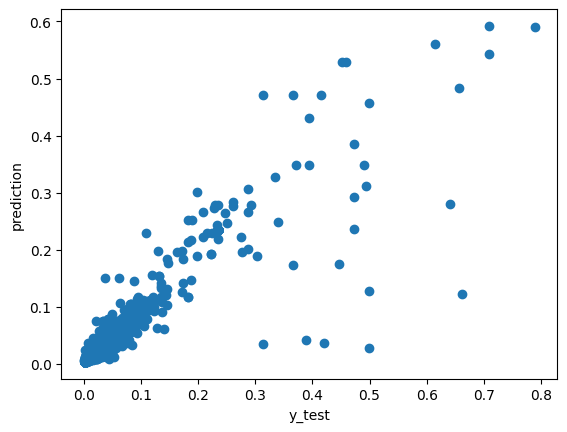

In [ ]:
plt.scatter(y_test,prediction)
plt.xlabel('y_test')
plt.ylabel('prediction')

In [ ]:
y_pred = modellll.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print('The Mean Squared error is : ', mse)
print('The Root Mean Squared error is : ', np.sqrt(mse))
print('The R2 Score is : ', r2_score(y_test,y_pred))

The Mean Squared error is :  0.00028384666012879086
The Root Mean Squared error is :  0.01684774940841627
The R2 Score is :  0.8907778816454408
